## Background of the Study:


The sinking of the Titanic is one of the most famous maritime disasters. The supposedly unsinkable Titanic succumbed to the sea after striking an iceberg on its inaugural journey. Survival during this calamity appeared to involve an element of chance, but certain demographics demonstrated higher likelihoods of making it through the disaster than others. In this study, we will see which demographics have an association with the passenger's survival rate.

## Statement of Study Objectives: 

1- Is there an association between a passenger's survival rate and their passenger class?<br>
2- Is there an association between a passenger's survival rate and their gender?<br>
3- Is there an association between a passenger's survival rate and their age?


## Hypothesis:

1- Survival rate is not related with passenger class.<br>
2- Survival rate is not related with gender. <br>
3- Survival rate is not related with age.


## Data Source:


https://kaggle.com/competitions/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variables:

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are **12 variables** and **891 observations** in the dataset:
* PassengerId - passenger identifier (Categorical)
* Survived - survival status with - 1 = Survived, 0 = Not Survived (Categorical)
* Pclass - passenger class ticket - 1 = Upper, 2 = Middle, 3 = Lower (Categorical)
* Name - passenger name (Categorical)
* Sex - passenger sex - male or female (Categorical)
* Age - passenger age in years (Numerical)
* SibSp - number of siblings/spouse aboard Titanic (Numerical)
* Parch - number of parents/ children aboard Titanic (Numerical)
* Ticket - ticket number (Categorical)
* Fare - passenger fare (Numerical)
* Cabin - cabin number (Categorical)
* Embarked - port of embarkation - C = Cherbourg, Q = Queenstown, S = Southampton (Categorical)

## Data Cleaning:

In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in 'Age', 'Cabin' and 'Embarked' columns. We will be dropping columns 'Cabin' and 'Embarked' as we will not be using these in our study. For the 'Age' column, we will mean replace the missing values.

In [5]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [6]:
titanic.drop('Embarked', axis = 1, inplace = True)

In [7]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## Univariate Analysis:

#### Pclass

In [9]:
freq_pclass = titanic['Pclass'].value_counts()
freq_pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
rf_pclass = freq_pclass/len(titanic['Pclass']) #relative frequency
rf_pclass

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [11]:
pclass_data = {'Passenger Class': [3, 1, 2], 'Count': freq_pclass.values, 'Relative Frequency': rf_pclass.values}
pclass_table = pd.DataFrame(pclass_data)
pclass_table

,Passenger Class,Count,Relative Frequency
0,3,491,0.551066
1,1,216,0.242424
2,2,184,0.206510


Text(0.5, 1.0, 'PASSENGER CLASS')

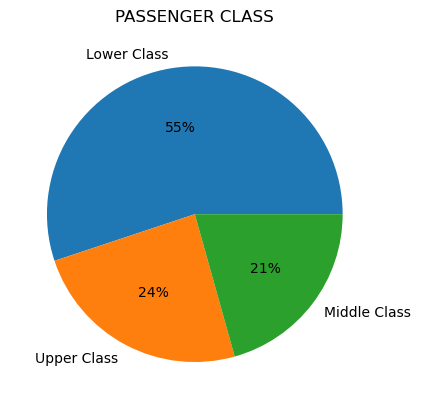

In [12]:
pclass_labels = ['Lower Class', 'Upper Class', 'Middle Class']
plt.pie(rf_pclass, labels = pclass_labels, autopct='%1.0f%%')
plt.title('PASSENGER CLASS')

More than half of the passenger population were from the lower class.

#### Sex

In [13]:
freq_sex = titanic['Sex'].value_counts()
freq_sex

male      577
female    314
Name: Sex, dtype: int64

In [14]:
rf_sex = freq_sex/len(titanic['Sex']) #relative frequency
rf_sex

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
sex_data = {'Passenger Class': ['male', 'female'], 'Count': freq_sex.values, 'Relative Frequency': rf_sex.values}
sex_table = pd.DataFrame(sex_data)
sex_table

,Passenger Class,Count,Relative Frequency
0,male,577,0.647587
1,female,314,0.352413


Text(0.5, 1.0, 'PASSENGER SEX')

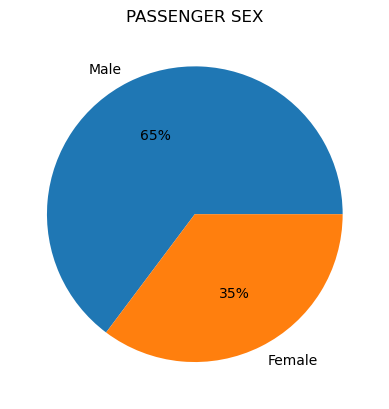

In [16]:
sex_labels = ['Male', 'Female']
plt.pie(rf_sex, labels = sex_labels, autopct='%1.0f%%')
plt.title('PASSENGER SEX')

Majority of the passengers are male comprising 65% of total population.

#### Age

In [17]:
titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
titanic['Age'].median()

29.69911764705882

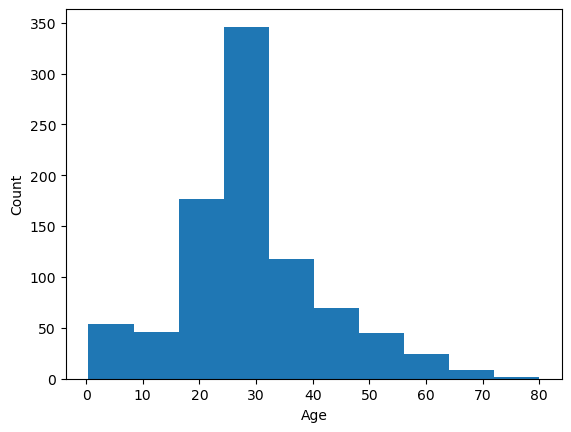

In [19]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(titanic['Age'])
plt.show()

The distribution of age is symmetrical in shape with mean = median of 30 years old. However, it is important to note that 177 of missing values were mean replaced and the presence of outliers. 

## Bivariate Analysis:

#### Chi-Square - Survival Rate and Passenger Class

In [20]:
pclass_sr = pd.crosstab(titanic['Pclass'], titanic['Survived'])
pclass_sr

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [21]:
rf_pclass_sr = (pclass_sr.div(pclass_sr.sum(axis=1), axis=0)*100)
rf_pclass_sr

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


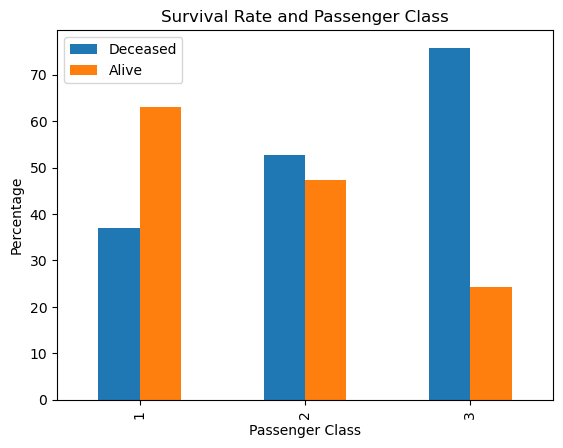

In [30]:
rf_pclass_sr.plot.bar(stacked=False)
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.title('Survival Rate and Passenger Class')
plt.legend(['Deceased', 'Alive'], loc = 'upper left')
plt.show()

The group of bars are different signifying a relationship between the survival rate and passenger class. To check this, we will do a chi-square analysis.

H0 - Survival rate and passenger class are independent. <br>
Ha - Survival rate and passenger class are not independent (the two variables are related).

In [23]:
chi2_stat, p_value, dof, expected = chi2_contingency(pclass_sr)
print(f"Chi-square Statistics: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistics: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


Chi-square statistic > P-value so we reject our H0 and conclude that the survival rate and passenger class are not independent. The two variables are related as can be seen from the graph, the higher the passenger class, the higher rate of survival.

#### Chi-Square - Survival Rate and Sex

In [24]:
sex_sr = pd.crosstab(titanic['Sex'], titanic['Survived'])
sex_sr

Survived,0,1
Sex,,
female,81,233
male,468,109


In [25]:
rf_sex_sr = (sex_sr.div(sex_sr.sum(axis=1), axis=0)*100)
rf_sex_sr

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


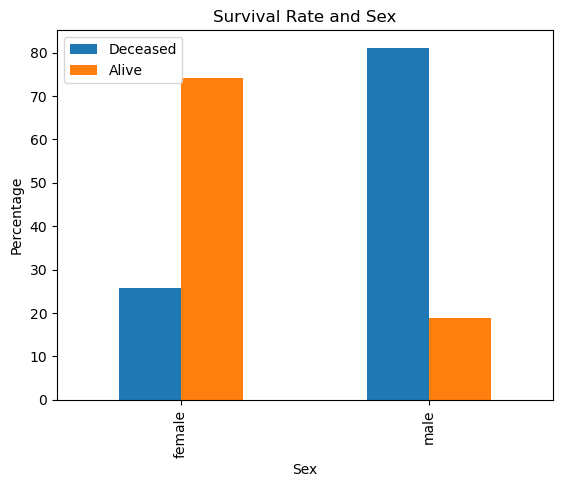

In [29]:
rf_sex_sr.plot.bar(stacked=False)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Survival Rate and Sex')
plt.legend(['Deceased', 'Alive'], loc = 'upper left')
plt.show()

The group of bars are different signifying a relationship between the survival rate and sex. To check this, we will do a chi-square analysis.

H0 - Survival rate and sex are independent. <br>
Ha - Survival rate and sex are not independent (the two variables are related).

In [27]:
chi2_stat, p_value, dof, expected = chi2_contingency(sex_sr)
print(f"Chi-square Statistics: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistics: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies:
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


Chi-square statistic > P-value so we reject our H0 and conclude that the survival rate and sex are not independent. The two variables are related as can be seen from the graph, female have higher rate of survival than male.

#### Chi-Square - Survival Rate and Passenger Age

In [44]:
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=4, labels=['0-22', '22-30', '31-34', '35-above'])
age_sr = pd.crosstab(titanic['Age_Group'], titanic['Survived'])
age_sr

Survived,0,1
Age_Group,,
0-22,97,82
22-30,357,205
31-34,78,50
35-above,17,5


In [45]:
rf_age_sr = (age_sr.div(age_sr.sum(axis=1), axis=0)*100)
rf_age_sr

Survived,0,1
Age_Group,,
0-22,54.189944,45.810056
22-30,63.523132,36.476868
31-34,60.937500,39.062500
35-above,77.272727,22.727273


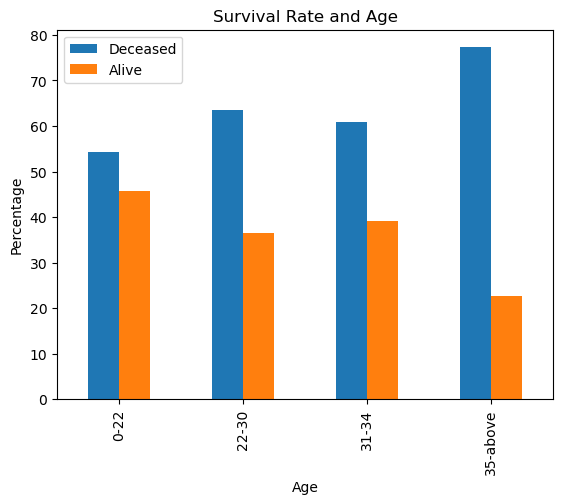

In [48]:
rf_age_sr.plot.bar(stacked=False)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Survival Rate and Age')
plt.legend(['Deceased', 'Alive'], loc = 'upper left')
plt.show()

The group of bars are similar signifying independence between the survival rate and age. To check this, we will do a chi-square analysis.

H0 - Survival rate and age are independent. <br>
Ha - Survival rate and age are not independent (the two variables are related).

In [46]:
chi2_stat, p_value, dof, expected = chi2_contingency(age_sr)
print(f"Chi-square Statistics: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistics: 7.343190988756515
P-value: 0.06172743353608069
Degrees of Freedom: 3
Expected Frequencies:
[[110.29292929  68.70707071]
 [346.28282828 215.71717172]
 [ 78.86868687  49.13131313]
 [ 13.55555556   8.44444444]]


With a p-value of 0.0617, it is larger than the default significance level of 0.05 so we accept the null hypothesis that survival rate and age are independent.

## Conclusion and Findings:

1- Is there an association between a passenger's survival rate and their passenger class?<br>

**We reject our hypothesis and conclude that passenger's survival rate is related to the passenger class. Data shows that the higher the passenger class, the higher the survival rate.**

2- Is there an association between a passenger's survival rate and their gender?<br>

**We reject our hypothesis and conclude that passenger's survival rate is related to passenger sex. Data shows that female passengers have higher rate of survival than male.**

3- Is there an association between a passenger's survival rate and their age?

**We accept our hypothesis that passenger's survival rate are not related to their age.**